#Insurance Amount prediction

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [53]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/insurance.csv')

In [54]:
df_train.shape

(1338, 7)

In [55]:
df_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
df_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Target variable 'Charges'

In [57]:
df_train['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [58]:
df_train['charges'].isnull().sum()

0

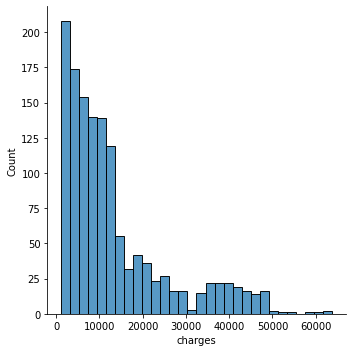

In [59]:
sns.displot(df_train['charges'],);

In [60]:
df_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
df_train.select_dtypes(include=np.number).columns.tolist()

['age', 'bmi', 'children', 'charges']

In [62]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [63]:
print (round((df_train.isnull().sum()).sort_values(ascending=False)))

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64


In [64]:
print (round((df_train.isnull().sum() * 100/ len(df_train)),2).sort_values(ascending=False))

charges     0.0
region      0.0
smoker      0.0
children    0.0
bmi         0.0
sex         0.0
age         0.0
dtype: float64


In [65]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df_train)

Your selected dataframe has 7 columns and 1338 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [66]:
df_train.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [67]:
df_train['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [68]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
X = df_train.iloc[:, :-1].values #selecting from 4th to before last column of the dataframe
y = df_train.iloc[:, -1].values #selecting last column

In [70]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [71]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

Perform label encoding to convert sex column

**Limitation of label Encoding**

Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issue in training of data sets. A label with high value may be considered to have high priority than a label having lower value.

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1]) 

In [73]:
X

array([[19, 0, 27.9, 0, 'yes', 'southwest'],
       [18, 1, 33.77, 1, 'no', 'southeast'],
       [28, 1, 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 0, 36.85, 0, 'no', 'southeast'],
       [21, 0, 25.8, 0, 'no', 'southwest'],
       [61, 0, 29.07, 0, 'yes', 'northwest']], dtype=object)

perform label encoder for smoker column

In [74]:
X[:, 4] = le.fit_transform(X[:, 4]) 

In [75]:
X

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [76]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
df_train['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Performing one hot encoding

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [79]:
X

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [80]:
X[0] # southwest

array([0.0, 0.0, 0.0, 1.0, 19, 0, 27.9, 0, 1], dtype=object)

In [81]:
X[1] #southeast

array([0.0, 0.0, 1.0, 0.0, 18, 1, 33.77, 1, 0], dtype=object)

In [82]:
X[3] #northwest

array([0.0, 1.0, 0.0, 0.0, 33, 1, 22.705, 0, 0], dtype=object)

In [83]:
X[1334] #northeast

array([1.0, 0.0, 0.0, 0.0, 18, 0, 31.92, 0, 0], dtype=object)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #standardizing data of all columns so that all the columns have same scale
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [86]:
X_train

array([[-0.55071651, -0.55791981, -0.6155209 , ...,  0.54530479,
         2.41394802,  1.97125461],
       [-0.55071651, -0.55791981,  1.6246402 , ...,  0.59867181,
        -0.89219519, -0.50729114],
       [ 1.81581628, -0.55791981, -0.6155209 , ...,  0.96092064,
         0.76087642,  1.97125461],
       ...,
       [-0.55071651, -0.55791981,  1.6246402 , ..., -0.91339361,
        -0.89219519, -0.50729114],
       [-0.55071651,  1.79237229, -0.6155209 , ...,  0.77656186,
        -0.89219519, -0.50729114],
       [-0.55071651, -0.55791981, -0.6155209 , ..., -1.97749955,
        -0.06565939, -0.50729114]])

In [87]:
X_test

array([[-0.55071651, -0.55791981, -0.6155209 , ..., -0.08539629,
        -0.06565939, -0.50729114],
       [-0.55071651, -0.55791981,  1.6246402 , ..., -0.21962242,
        -0.06565939, -0.50729114],
       [-0.55071651,  1.79237229, -0.6155209 , ...,  1.59081313,
         0.76087642,  1.97125461],
       ...,
       [ 1.81581628, -0.55791981, -0.6155209 , ...,  1.54472343,
        -0.89219519, -0.50729114],
       [-0.55071651, -0.55791981,  1.6246402 , ...,  1.34581001,
         1.58741222,  1.97125461],
       [ 1.81581628, -0.55791981, -0.6155209 , ..., -0.95948331,
         1.58741222, -0.50729114]])

Linear Regression model

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge

In [89]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

#predictions on train data
x_pred = linear_model.predict(X_train)
x_pred = x_pred.reshape(-1,1)

x_pred

array([[33086.15996457],
       [ 3643.18985361],
       [30686.15996457],
       ...,
       [ 6139.18985361],
       [ 4635.18985361],
       [ 2027.18985361]])

In [90]:
#Prediction of validation data
y_predictions = linear_model.predict(X_test)
y_predictions= y_predictions.reshape(-1,1)
y_predictions

array([[10763.18985361],
       [ 9787.18985361],
       [38126.15996457],
       [16267.18985361],
       [ 6987.18985361],
       [ 3979.18985361],
       [ 1547.18985361],
       [14347.18985361],
       [ 8987.18985361],
       [ 7483.18985361],
       [ 4475.18985361],
       [10299.18985361],
       [ 8363.18985361],
       [ 4107.18985361],
       [27902.15996457],
       [10987.18985361],
       [11355.18985361],
       [ 6075.18985361],
       [ 8251.18985361],
       [27070.15996457],
       [33662.15996457],
       [14347.18985361],
       [11723.18985361],
       [32414.15996457],
       [ 4443.18985361],
       [ 9195.18985361],
       [ 1099.18985361],
       [10059.18985361],
       [ 4075.18985361],
       [10443.18985361],
       [ 8987.18985361],
       [40318.15996457],
       [15259.18985361],
       [13451.18985361],
       [24734.15996457],
       [ 5131.18985361],
       [12875.18985361],
       [30270.15996457],
       [33502.15996457],
       [ 3195.18985361],


In [91]:
def scores_(y,x):
    print('MAE:', metrics.mean_absolute_error(y, x))
    print('MSE:', metrics.mean_squared_error(y, x))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
    print('R2 Score:' ,metrics.r2_score(y,x))

print('InSample_accuracy')
scores_(y_train, x_pred)
print('---------------------------')
print('OutSample_accuracy')
scores_(y_test,y_predictions)

InSample_accuracy
MAE: 4235.478281175303
MSE: 37770269.68547195
RMSE: 6145.752165965689
R2 Score: 0.736546809854427
---------------------------
OutSample_accuracy
MAE: 3929.6376020595667
MSE: 31827610.780321147
RMSE: 5641.596474431785
R2 Score: 0.7999898302251041


In [92]:
from sklearn.externals import joblib
joblib.dump(linear_model, "/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/HealthInsurancePrediction.pkl")


['/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/HealthInsurancePrediction.pkl']

In [93]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
from sklearn.externals import joblib
age = 28
sex = 'male' #male=1, female=0
bmi = 33.200
children = 2
smoker = 'no' #yes=1, no=0
region = 'northwest' 

converting the input record into model accepted format

In [95]:
pred_args=[0,1,0,0,28,1,33,3,0]

Convert into numpy array format

In [96]:
pred_args_arr=np.array(pred_args)
pred_args_arr = pred_args_arr.reshape(1, -1)

We need to use transform() method not the fit_transform() method to test for new data

In [97]:
pred_args_arr=sc.transform(pred_args_arr)

In [98]:
pred_args_arr

array([[-0.55071651,  1.79237229, -0.6155209 , -0.58526447, -0.78766322,
         1.01506676,  0.36741474,  1.58741222, -0.50729114]])

In [99]:
mul_reg = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/HealthInsurancePrediction.pkl","rb")
ml_model = joblib.load(mul_reg)
model_prediction = ml_model.predict(pred_args_arr)

round(float(model_prediction), 2)

7371.93

Putting multiple objects into the pickle file such as linear_model and sc (standardscaler)

In [100]:
joblib.dump((linear_model,sc), "/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/HealthInsurancePrediction.pkl")


['/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/HealthInsurancePrediction.pkl']

In [101]:
mul_reg = open("/content/drive/MyDrive/Colab Notebooks/Projects/Health Insurance Charges Prediction/HealthInsurancePrediction.pkl","rb")
lin_model,std_scalar = joblib.load(mul_reg)
model_prediction = lin_model.predict(pred_args_arr)

round(float(model_prediction), 2)

7371.93